In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
pd.options.mode.chained_assignment = None

In [9]:
df=pd.read_csv("covid_19_clean_complete.csv")
pd.set_option('display.max_rows',190)
df1=df.drop(["Province/State","WHO Region","Lat","Long"],axis=1)
df2=df1[(df1["Country/Region"]=="India")]
df3=df2.copy()
df2["Date"] = pd.to_datetime(df2["Date"])
df3['date']=df2['Date'].dt.day.astype("str")+"/"+df2['Date'].dt.month.astype("str")
df3['month']=df2['Date'].dt.month.astype("str")
df3=df3.drop("Date",axis=1)
df4=df3.groupby("month").sum()
df4["DeathPercentage"]=(df4.Deaths.astype("int")/(df4.Confirmed.astype("int")))*100
df4
# India

,Confirmed,Deaths,Recovered,Active,DeathPercentage
month,,,,,
1,2,0,0,2,0.000000
2,84,0,42,42,0.000000
3,10252,226,818,9208,2.204448
4,447607,14417,85811,347379,3.220906
5,3088494,94154,1216954,1777386,3.048541
6,10951713,331856,5916008,4703849,3.030174
7,26385312,671178,16564087,9150047,2.543756


In [11]:
df5=pd.read_csv("usa_county_wise.csv")
pd.set_option('display.max_rows',190)
df6=df5.drop(["Province_State","UID","iso2","iso3","code3","FIPS","Admin2","Lat","Long_","Combined_Key"],axis=1)
df7=df6.copy()
df7["Date"] = pd.to_datetime(df7["Date"])
df7['month']=df7['Date'].dt.month.astype("str")
df8=df7.groupby("month").sum()
df8["DeathPercentage"]=(df8.Deaths.astype("int")/df8.Confirmed.astype("int"))*100
df8
# USA

,Confirmed,Deaths,DeathPercentage
month,,,
1,38,0,0.000000
2,378,1,0.264550
3,1091068,26160,2.397651
4,19552582,1035013,5.293485
5,45407574,2728676,6.009297
6,64933835,3518537,5.418650
7,93360473,3703024,3.966372


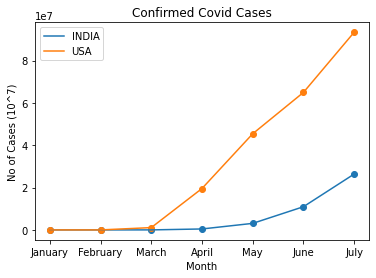

In [15]:
m=["January","February","March","April","May","June","July"]
y=df3.groupby("month").sum().Confirmed
z=df8.Confirmed
mp.plot(m,y,label="INDIA")
mp.scatter(m,y)
mp.plot(m,z,label="USA")
mp.scatter(m,z)
mp.xlabel('Month')
mp.ylabel('No of Cases (10^7)')
mp.title('Confirmed Covid Cases')
mp.legend()
mp.show()

The number of Covid cases increased exponentially in both the countries but the situation was much worse in USA. The first wave came in USA in March as compared to April in India. 

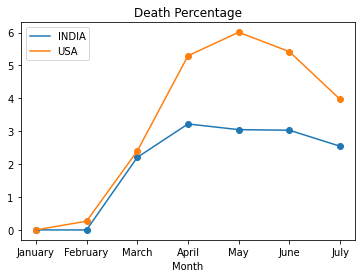

In [17]:
m=["January","February","March","April","May","June","July"]
y=df4.DeathPercentage
mp.plot(m,y,label="INDIA")
mp.scatter(m,y)
mp.xlabel('Month')
mp.title('Death Percentage')
z=df8.DeathPercentage
mp.scatter(m,z)
mp.plot(m,z,label="USA")
mp.legend()
mp.show()
# Deaths Vs Confirmed Cases Percentage Graph

The Death rate due to Covid-19 was much higher in USA than in India. This coupled with the fact that India has a much higher population than USA indicates a very poor condition of USA. The health-care system could not bear the burden of the huge number of cases and the recovery rate did not improve much. 

Death rate started going down in India a month earlier than it did in the USA. Also, at their highest points, the death percentage of USA was nearly double of that of India. 

This indicates a severe mismanagement of the pandemic in the USA as well and paints a terrible picture of the US health-care system. 